In [129]:
# pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn import metrics

In [7]:
# df = pd.read_csv('dataset/text_distance/dataset.csv')
df = pd.read_csv('dataset/semantic_similarity/dataset.csv')

In [8]:
df['Key'].unique()

array(['ธัญพืช', 'Cereals',
       'ครั่ง รวมทั้งกัม เรซิน น้ำเลี้ยง(แซบ) และสิ่งสกัดอื่นๆ จากพืช',
       'Lac ; gum, resins and other vegetable saps and extracts',
       'ไขมันและน้ำมันที่ได้จากสัตว์หรือพืช และผลิตภัณฑ์ที่แยกได้จากไขมันและน้ำมันดังกล่าว ไขมันที่บริโภคซึ่งจัดทำแล้ว ไขที่ได้จากสัตว์หรือพืช',
       'Animal or vegetable fats and oils and their cleavage products ; prepared edible fats ; animal or vegetable waxes'],
      dtype=object)

In [9]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [10]:
sentences1 = df['Query'].values
sentences2 = df['Key'].unique()

In [11]:
len(sentences1)

12

In [12]:
len(sentences2)

6

In [13]:
sentences_text = np.append(sentences1, sentences2)

In [14]:
#Compute embedding for both lists
X = model.encode(sentences_text, convert_to_tensor=True)

In [36]:
# X = sentences

In [37]:
X.max()

tensor(0.1898)

In [15]:
# X2 = np.array([[1, 2], [2, 5], [3, 6],
#               [8, 7], [8, 8], [7, 3]])
# clustering = OPTICS(min_samples=2).fit(X2)
# clustering.labels_

array([ 0, -1,  0, -1,  1, -1,  2, -1, -1, -1,  2, -1,  0, -1,  1, -1,  2,
       -1])

In [16]:
# # X = np.array([[1, 2], [2, 2], [2, 3],
# #               [8, 7], [8, 8], [25, 80]])
# clustering = DBSCAN(eps=0.85, min_samples=10).fit(X)
# clustering.labels_


In [122]:
# from sklearn.cluster import KMeans



In [99]:
import hdbscan

X_umap = umap.UMAP(n_neighbors=5, n_components=3).fit_transform(X)
clusterer = hdbscan.HDBSCAN(alpha=1.0, min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X_umap)
cluster_labels

array([ 1, -1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1, -1,  1,  1,  0,
        0])

In [100]:
n_group = cluster_labels.max()+1
for i in range(n_group):
    print(f'--- group: {i} ---')
    for j, text in enumerate(sentences_text):
        if cluster_labels[j] == i:
            print(f'    {j}: {text}')

--- group: 0 ---
    6: น้ำมันมะพร้าว น้ำมันเนื้อในเมล็ดปาล์ม น้ำมันบาบาสสุ และเศษของน้ำมันดังกล่าว จะทำให้บริสุทธิ์หรือไม่ก็ตาม แต่ต้องไม่ดัดแปลงทางเคมี
    7: Coconut (copra), palm kernel or babassu oil and fractions thereof, whether or not refined, but not chemically modified.
    10: ไขมันหรือน้ำมันที่ได้จากสัตว์หรือพืชและเศษของของดังกล่าว  ที่ผ่านกรรมวิธีไฮโดรจีเนชันเพียงบางส่วนหรือทั้งหมด  ที่ผ่านกรรมวิธีอินเตอร์เอสเทอริฟิเคชัน                  รีเอสเทอริฟิเคชันหรือกรรมวิธีอิเลดิไนเซชัน  จะทำให้บริสุทธิ์หรือไม่ก็ตาม แต่ต้องไม่จัดทำ
    11: Animal or vegetable fats and oils and their fractions, partly or wholly hydrogenated, inter-esterified, re-esterified or elaidinised, whether or not refined, but not further prepared.
    16: ไขมันและน้ำมันที่ได้จากสัตว์หรือพืช และผลิตภัณฑ์ที่แยกได้จากไขมันและน้ำมันดังกล่าว ไขมันที่บริโภคซึ่งจัดทำแล้ว ไขที่ได้จากสัตว์หรือพืช
    17: Animal or vegetable fats and oils and their cleavage products ; prepared edible fats ; animal or vegetable waxes


In [109]:
X_umap = umap.UMAP(n_neighbors=5, n_components=3).fit_transform(X)

clustering = DBSCAN(eps=0.84, min_samples=2).fit(X_umap)
clustering.labels_

array([0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2])

In [110]:
n_group = clustering.labels_.max()+1
for i in range(n_group):
    print(f'--- group: {i} ---')
    for j, text in enumerate(sentences_text):
        if clustering.labels_[j] == i:
            print(f'    {j}: {text}')

--- group: 0 ---
    0: ข้าวโพด
    1: Maize (corn).
    2: ข้าว
    3: Rice.
    12: ธัญพืช
    13: Cereals
--- group: 1 ---
    4: น้ำเลี้ยง (แซป) และสิ่งสกัดจากพืช สารจำพวกเพกติก เกลือของกรดเพกตินิก (เพกติเนต) และเกลือของเพกติก (เพกเตต)  รวมทั้งวุ้นที่ได้จากสาหร่ายทะเล และวุ้นและยางข้นอื่น ๆ ที่ได้จากผลิตภัณฑ์จากพืช จะดัดแปลงหรือไม่ก็ตาม
    5: Vegetable saps and extracts; pectic substances, pectinates and pectates; agar-agar and other mucilages and thickeners, whether or not modified, derived from vegetable products.
    8: ไขมันและน้ำมันชนิดระเหยยากอื่น ๆ ที่ได้จากพืช  (รวมถึงน้ำมันโจโจบา)  และเศษของของดังกล่าว  (นอกจากที่ระบุไว้ตามประเภทที่ 15.07 ถึง 15.14  เช่น               น้ำมันถั่วเหลือง น้ำมันถั่วลิสง น้ำมันมะกอก น้ำมันปาล์ม น้ำมันที่ได้จากเมล็ดทานตะวัน น้ำมันเมล็ดฝ
    9: Other fixed vegetable fats and oils (including jojoba oil) and their fractions, (other than those specified of heading no.15.07 to 15.14   e.g. : soya bean, ground-nut, olive, palm, sunflower-seed, cotton

In [33]:
# pip install hdbscan

In [24]:
import umap
import umap.plot
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP().fit_transform(digits.data)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

<AxesSubplot: >

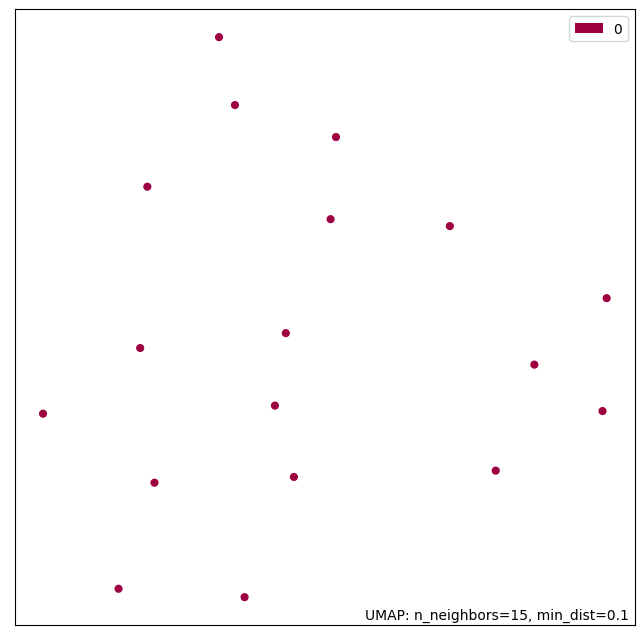

In [30]:
X_umap = umap.UMAP().fit(X)
umap.plot.points(X_umap, labels=clustering.labels_)

In [44]:

# clustering = DBSCAN(eps=3, min_samples=2).fit(X_umap)
# clustering.labels_

In [20]:
X_umap

array([[20.105549 ,  6.3194466],
       [20.277779 ,  8.048283 ],
       [20.210068 ,  6.8521123],
       [19.798462 ,  7.5697355],
       [22.58219  ,  7.7871366],
       [21.871683 ,  7.8504887],
       [22.984646 ,  6.339629 ],
       [23.386438 ,  6.8196435],
       [22.285566 ,  6.9227614],
       [22.856913 ,  7.057416 ],
       [21.814058 ,  5.475204 ],
       [22.748432 ,  5.7941456],
       [20.834381 ,  6.5790725],
       [20.449001 ,  7.582313 ],
       [21.427614 ,  6.8065705],
       [21.601133 ,  7.3614902],
       [21.82691  ,  6.1394544],
       [22.19166  ,  5.9485583]], dtype=float32)

In [5]:
embedding

array([[16.095373  , 11.52593   ],
       [-2.8954937 , 10.74756   ],
       [ 0.9894838 ,  9.217777  ],
       ...,
       [-1.1828638 ,  9.22365   ],
       [-2.4910276 ,  2.6053925 ],
       [-0.64394724,  9.091259  ]], dtype=float32)

## Kmean

In [123]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(X)
kmeans.labels_

array([0, 0, 0, 0, 3, 5, 1, 4, 3, 4, 1, 1, 0, 0, 3, 2, 1, 1], dtype=int32)

##### silhouette score

In [124]:
kmean_silhouette = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
kmean_silhouette

0.12312923

##### cluster result

In [126]:
n_group = kmeans.labels_.max()+1
for i in range(n_group):
    print(f'--- group: {i} ---')
    for j, text in enumerate(sentences_text):
        if kmeans.labels_[j] == i:
            print(f'    {j}: {text}')

--- group: 0 ---
    0: ข้าวโพด
    1: Maize (corn).
    2: ข้าว
    3: Rice.
    12: ธัญพืช
    13: Cereals
--- group: 1 ---
    6: น้ำมันมะพร้าว น้ำมันเนื้อในเมล็ดปาล์ม น้ำมันบาบาสสุ และเศษของน้ำมันดังกล่าว จะทำให้บริสุทธิ์หรือไม่ก็ตาม แต่ต้องไม่ดัดแปลงทางเคมี
    10: ไขมันหรือน้ำมันที่ได้จากสัตว์หรือพืชและเศษของของดังกล่าว  ที่ผ่านกรรมวิธีไฮโดรจีเนชันเพียงบางส่วนหรือทั้งหมด  ที่ผ่านกรรมวิธีอินเตอร์เอสเทอริฟิเคชัน                  รีเอสเทอริฟิเคชันหรือกรรมวิธีอิเลดิไนเซชัน  จะทำให้บริสุทธิ์หรือไม่ก็ตาม แต่ต้องไม่จัดทำ
    11: Animal or vegetable fats and oils and their fractions, partly or wholly hydrogenated, inter-esterified, re-esterified or elaidinised, whether or not refined, but not further prepared.
    16: ไขมันและน้ำมันที่ได้จากสัตว์หรือพืช และผลิตภัณฑ์ที่แยกได้จากไขมันและน้ำมันดังกล่าว ไขมันที่บริโภคซึ่งจัดทำแล้ว ไขที่ได้จากสัตว์หรือพืช
    17: Animal or vegetable fats and oils and their cleavage products ; prepared edible fats ; animal or vegetable waxes
--- group: 2 ---
 

## OPTICS

In [115]:
optics = OPTICS(min_samples=2, eps=20).fit(X)
optics.labels_

array([ 0, -1,  0, -1,  1, -1,  2, -1, -1, -1,  2, -1,  0, -1,  1, -1,  2,
       -1])

##### silhouette score

In [116]:
optics_silhouette = metrics.silhouette_score(X, clustering.labels_, metric='euclidean')
optics_silhouette

-0.0068369284

##### cluster result

In [127]:
n_group = optics.labels_.max()+1
for i in range(n_group):
    print(f'--- group: {i} ---')
    for j, text in enumerate(sentences_text):
        if clustering.labels_[j] == i:
            print(f'    {j}: {text}')


--- group: 0 ---
    0: ข้าวโพด
    2: ข้าว
    12: ธัญพืช
--- group: 1 ---
    4: น้ำเลี้ยง (แซป) และสิ่งสกัดจากพืช สารจำพวกเพกติก เกลือของกรดเพกตินิก (เพกติเนต) และเกลือของเพกติก (เพกเตต)  รวมทั้งวุ้นที่ได้จากสาหร่ายทะเล และวุ้นและยางข้นอื่น ๆ ที่ได้จากผลิตภัณฑ์จากพืช จะดัดแปลงหรือไม่ก็ตาม
    14: ครั่ง รวมทั้งกัม เรซิน น้ำเลี้ยง(แซบ) และสิ่งสกัดอื่นๆ จากพืช
--- group: 2 ---
    6: น้ำมันมะพร้าว น้ำมันเนื้อในเมล็ดปาล์ม น้ำมันบาบาสสุ และเศษของน้ำมันดังกล่าว จะทำให้บริสุทธิ์หรือไม่ก็ตาม แต่ต้องไม่ดัดแปลงทางเคมี
    10: ไขมันหรือน้ำมันที่ได้จากสัตว์หรือพืชและเศษของของดังกล่าว  ที่ผ่านกรรมวิธีไฮโดรจีเนชันเพียงบางส่วนหรือทั้งหมด  ที่ผ่านกรรมวิธีอินเตอร์เอสเทอริฟิเคชัน                  รีเอสเทอริฟิเคชันหรือกรรมวิธีอิเลดิไนเซชัน  จะทำให้บริสุทธิ์หรือไม่ก็ตาม แต่ต้องไม่จัดทำ
    16: ไขมันและน้ำมันที่ได้จากสัตว์หรือพืช และผลิตภัณฑ์ที่แยกได้จากไขมันและน้ำมันดังกล่าว ไขมันที่บริโภคซึ่งจัดทำแล้ว ไขที่ได้จากสัตว์หรือพืช
